In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("new_train.csv",index_col = 'Date', parse_dates = True)

In [3]:
train.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [4]:
train.isna().sum()

Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

In [5]:
train['diff_1'] = train['Close-Stock-1'] - train['Open-Stock-1']

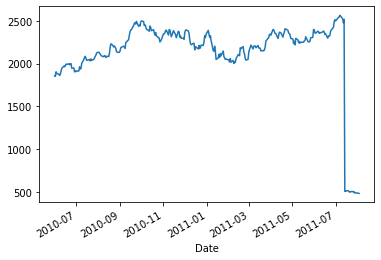

In [6]:
train['Close-Stock-1'].plot()

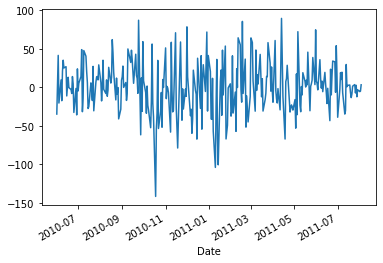

In [7]:
train['diff_1'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(train['Close-Stock-1'])

1. ADF :  -1.0109593608417102
2. P-Value :  0.7492461683155921
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 298
5. Critical Values :
	 1% :  -3.4524859843440754
	 5% :  -2.871288184343229
	 10% :  -2.571964047565425


In [9]:
ad_test(train['diff_1'])

1. ADF :  -6.872951941900281
2. P-Value :  1.4993656688833762e-09
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 295
5. Critical Values :
	 1% :  -3.452713099849546
	 5% :  -2.871387839457783
	 10% :  -2.5720171933352485


In [10]:
#P value not less than 0.05 hence the dataset is not stationary 

In [11]:
train['Close-Stock-1'] = train['Close-Stock-1'].diff()

In [12]:
train['diff_1'] = train['diff_1'].diff()

In [13]:
train['Close-Stock-1']

Date
2010-06-01      NaN
2010-06-02    -2.05
2010-06-03    52.55
2010-06-04   -19.90
2010-06-07    -9.05
              ...  
2011-07-28   -14.75
2011-07-29    -0.50
2011-08-01     1.20
2011-08-02    -5.15
2011-08-03    -0.80
Name: Close-Stock-1, Length: 299, dtype: float64

In [14]:
train['diff_1']

Date
2010-06-01      NaN
2010-06-02    39.65
2010-06-03    36.45
2010-06-04   -61.80
2010-06-07    29.95
              ...  
2011-07-28   -14.90
2011-07-29     9.10
2011-08-01    -2.35
2011-08-02     0.40
2011-08-03     8.40
Name: diff_1, Length: 299, dtype: float64

In [15]:
train = train.dropna()

In [16]:
train['Close-Stock-1']

Date
2010-06-02    -2.05
2010-06-03    52.55
2010-06-04   -19.90
2010-06-07    -9.05
2010-06-08   -13.95
              ...  
2011-07-28   -14.75
2011-07-29    -0.50
2011-08-01     1.20
2011-08-02    -5.15
2011-08-03    -0.80
Name: Close-Stock-1, Length: 298, dtype: float64

In [17]:
ad_test(train['Close-Stock-1'])

1. ADF :  -17.525889539403863
2. P-Value :  4.2616699209819644e-30
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 297
5. Critical Values :
	 1% :  -3.4525611751768914
	 5% :  -2.87132117782556
	 10% :  -2.5719816428028888


In [18]:
ad_test(train['diff_1'])

1. ADF :  -8.611669059361782
2. P-Value :  6.450854303289554e-14
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 284
5. Critical Values :
	 1% :  -3.4535872903895797
	 5% :  -2.871771355211212
	 10% :  -2.5722217283277127


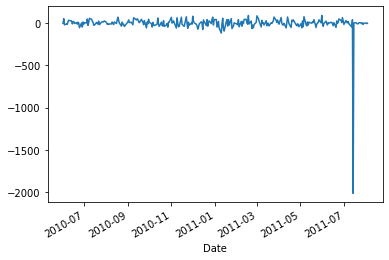

In [19]:
train['Close-Stock-1'].plot()

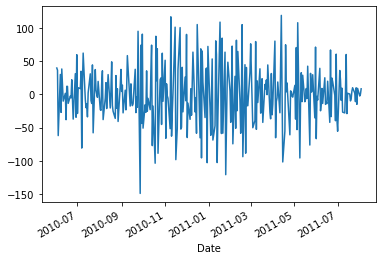

In [20]:
train['diff_1'].plot()

In [21]:
from pmdarima import auto_arima

In [22]:
#Auto arima is going to try diff values for the orders like (0,0,0), (0,0,1) and so on and return the best set of values for orders
stepwise_fit = auto_arima(train['Close-Stock-1'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3716.650, Time=1.79 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3709.111, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3710.992, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3710.995, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3707.541, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3712.963, Time=0.25 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.623 seconds


In [23]:
stepwise_fit = auto_arima(train['diff_1'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3130.573, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3053.867, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2949.063, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3128.575, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2952.162, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2947.095, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2948.547, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2948.565, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3051.870, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2950.195, Time=0.17 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.685 seconds


In [24]:
#Goal is to minimise AIC

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
train.shape

(298, 36)

In [27]:
train_model = train.iloc[:-30]
test_model = train.iloc[-30:]
print(train_model.shape, test_model.shape)

(268, 36) (30, 36)


In [28]:
model = ARIMA(train_model['Close-Stock-1'], order = (0,0,0))
model = model.fit()
model.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Close-Stock-1   No. Observations:                  268
Model:                     ARMA(0, 0)   Log Likelihood               -1327.205
Method:                           css   S.D. of innovations             34.237
Date:                Sun, 10 Jan 2021   AIC                           2658.410
Time:                        21:04:26   BIC                           2665.592
Sample:                             0   HQIC                          2661.294
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7448      2.091      0.834      0.404      -2.354       5.844
==============================================================================
"""

In [29]:
model_1 = ARIMA(train_model['diff_1'], order = (0,0,1))
model_1 = model_1.fit()
model_1.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_1   No. Observations:                  268
Model:                     ARMA(0, 1)   Log Likelihood               -1332.965
Method:                       css-mle   S.D. of innovations             34.795
Date:                Sun, 10 Jan 2021   AIC                           2671.930
Time:                        21:04:26   BIC                           2682.703
Sample:                             0   HQIC                          2676.257
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0091      0.071     -0.128      0.898      -0.148       0.130
ma.L1.diff_1    -0.9712      0.024    -40.069      0.000      -1.019      -0.924
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0297           +0.0000j            1.0297            0.0000
-----------------------------------------------------------------------------
"""

In [30]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index = train.index[start:end+1]
print(pred)


Date
2011-06-23    1.744776
2011-06-24    1.744776
2011-06-27    1.744776
2011-06-28    1.744776
2011-06-29    1.744776
2011-06-30    1.744776
2011-07-01    1.744776
2011-07-04    1.744776
2011-07-05    1.744776
2011-07-06    1.744776
2011-07-07    1.744776
2011-07-08    1.744776
2011-07-11    1.744776
2011-07-12    1.744776
2011-07-13    1.744776
2011-07-14    1.744776
2011-07-15    1.744776
2011-07-18    1.744776
2011-07-19    1.744776
2011-07-20    1.744776
2011-07-21    1.744776
2011-07-22    1.744776
2011-07-25    1.744776
2011-07-26    1.744776
2011-07-27    1.744776
2011-07-28    1.744776
2011-07-29    1.744776
2011-08-01    1.744776
2011-08-02    1.744776
2011-08-03    1.744776
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [31]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred_1 =model_1.predict(start=start,end=end,typ='levels')
pred_1.index = train.index[start:end+1]
print(pred_1)


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Date
2011-06-23    11.439661
2011-06-24    -0.009052
2011-06-27    -0.009052
2011-06-28    -0.009052
2011-06-29    -0.009052
2011-06-30    -0.009052
2011-07-01    -0.009052
2011-07-04    -0.009052
2011-07-05    -0.009052
2011-07-06    -0.009052
2011-07-07    -0.009052
2011-07-08    -0.009052
2011-07-11    -0.009052
2011-07-12    -0.009052
2011-07-13    -0.009052
2011-07-14    -0.009052
2011-07-15    -0.009052
2011-07-18    -0.009052
2011-07-19    -0.009052
2011-07-20    -0.009052
2011-07-21    -0.009052
2011-07-22    -0.009052
2011-07-25    -0.009052
2011-07-26    -0.009052
2011-07-27    -0.009052
2011-07-28    -0.009052
2011-07-29    -0.009052
2011-08-01    -0.009052
2011-08-02    -0.009052
2011-08-03    -0.009052
dtype: float64


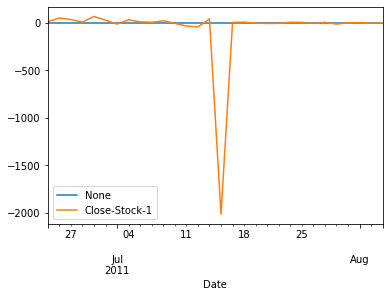

In [32]:
pred.plot(legend = True)
test_model['Close-Stock-1'].plot(legend = True)

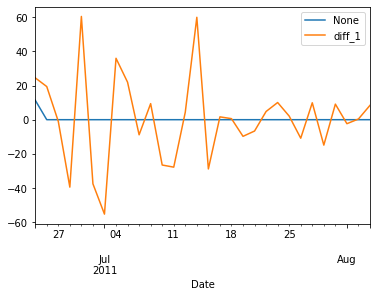

In [33]:
pred_1.plot(legend = True)
test_model['diff_1'].plot(legend = True)

In [34]:
test_model['Close-Stock-1'].mean()

-61.355

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['Close-Stock-1'].mean()
rmse=sqrt(mean_squared_error(pred,test_model['Close-Stock-1']))
print(rmse)

368.6691140277219


In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['diff_1'].mean()
rmse=sqrt(mean_squared_error(pred_1,test_model['diff_1']))
print(rmse)

25.1410709459515


In [37]:
test_op = pd.read_csv("new_test.csv",index_col = 'Date', parse_dates = True)

In [38]:
test_op.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,...,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,202.98,...,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,194.86,...,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,194.89,...,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,197.61,...,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,199.07,...,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


In [39]:
test_op.shape

(97, 30)

In [40]:
y =model_1.predict(start= 1,end= 97)

In [41]:
y

Date
2010-06-03   -19.830111
2010-06-04   -37.502436
2010-06-07    18.195982
2010-06-08    -9.400239
2010-06-09    14.592903
                ...    
2010-10-12    56.289121
2010-10-13    21.098941
2010-10-14   -51.374978
2010-10-15    24.775573
2010-10-18    41.040733
Length: 97, dtype: float64

In [42]:
y.shape

(97,)

In [43]:
output = pd.DataFrame(y)
output.to_csv('Stock1.csv', index=False)